In [19]:
#Import libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
import pickle

In [20]:
#Initial dataset
df = pd.read_csv('cwdataclean.csv')
df

Income  Area  Employed  Education  Home Owner  Gender_F  Gender_M  \
0     76300     1         1        1.0           1         0         1   
1     18500     0         0        0.0           0         1         0   
2     35250     1         1        1.0           1         1         0   
3     50000     1         1        2.0           1         0         1   
4     15000     0         0        0.0           0         1         0   
..      ...   ...       ...        ...         ...       ...       ...   
108   41230     1         1        2.0           1         0         1   
109   54560     1         1        2.0           1         1         0   
110    7650     0         0        0.0           0         0         1   
111    5450     0         0        0.0           0         1         0   
112   84500     1         1        1.0           1         0         1   

     Gender_PNS  Balance  Age  Colour  Fraud  
0             0    35000   25       0      0  
1             0     1025   25       3      1  
2             0     6750   39       7      0  
3             0     8100   35       0      0  
4             0      120   25       9      1  
..          ...      ...  ...     ...    ...  
108           0    54500   37       7      0  
109           0     3250   32       9      0  
110           0      123   23       6      1  
111           0      300   21       0      1  
112           0    24550   32       3      0  

[113 rows x 12 columns]

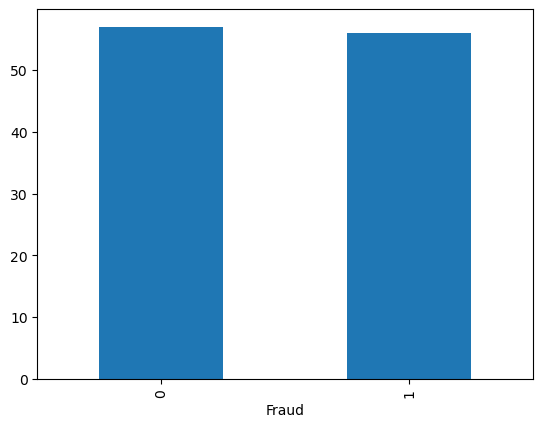

In [21]:
#Check bias of dataset using target value
df['Fraud'].value_counts().plot(kind='bar')
plt.show()

In [22]:
#Get correlations between features
corr = df.corr()
corr

Income      Area  Employed  Education  Home Owner  Gender_F  \
Income      1.000000  0.758320  0.677302   0.614908    0.674234  0.022225   
Area        0.758320  1.000000  0.843887   0.809031    0.863154  0.009758   
Employed    0.677302  0.843887  1.000000   0.742405    0.874843  0.072106   
Education   0.614908  0.809031  0.742405   1.000000    0.725731  0.089383   
Home Owner  0.674234  0.863154  0.874843   0.725731    1.000000  0.056084   
Gender_F    0.022225  0.009758  0.072106   0.089383    0.056084  1.000000   
Gender_M    0.005330  0.009088 -0.041877  -0.042052   -0.023660 -0.883195   
Gender_PNS -0.056931 -0.038987 -0.062021  -0.097323   -0.066718 -0.233069   
Balance     0.504402  0.430577  0.393383   0.364529    0.379319 -0.137243   
Age         0.578695  0.652020  0.573201   0.652712    0.558216  0.073140   
Colour     -0.179916 -0.127811 -0.146672  -0.168139   -0.145912 -0.005705   
Fraud      -0.741618 -0.964599 -0.843887  -0.809031   -0.863154 -0.009758   

            Gender_M  Gender_PNS   Balance       Age    Colour     Fraud  
Income      0.005330   -0.056931  0.504402  0.578695 -0.179916 -0.741618  
Area        0.009088   -0.038987  0.430577  0.652020 -0.127811 -0.964599  
Employed   -0.041877   -0.062021  0.393383  0.573201 -0.146672 -0.843887  
Education  -0.042052   -0.097323  0.364529  0.652712 -0.168139 -0.809031  
Home Owner -0.023660   -0.066718  0.379319  0.558216 -0.145912 -0.863154  
Gender_F   -0.883195   -0.233069 -0.137243  0.073140 -0.005705 -0.009758  
Gender_M    1.000000   -0.250244  0.145577 -0.022838 -0.036558 -0.009088  
Gender_PNS -0.250244    1.000000 -0.018531 -0.103631  0.087579  0.038987  
Balance     0.145577   -0.018531  1.000000  0.236423 -0.131136 -0.406551  
Age        -0.022838   -0.103631  0.236423  1.000000 -0.141746 -0.652020  
Colour     -0.036558    0.087579 -0.131136 -0.141746  1.000000  0.110312  
Fraud      -0.009088    0.038987 -0.406551 -0.652020  0.110312  1.000000

<Axes: >

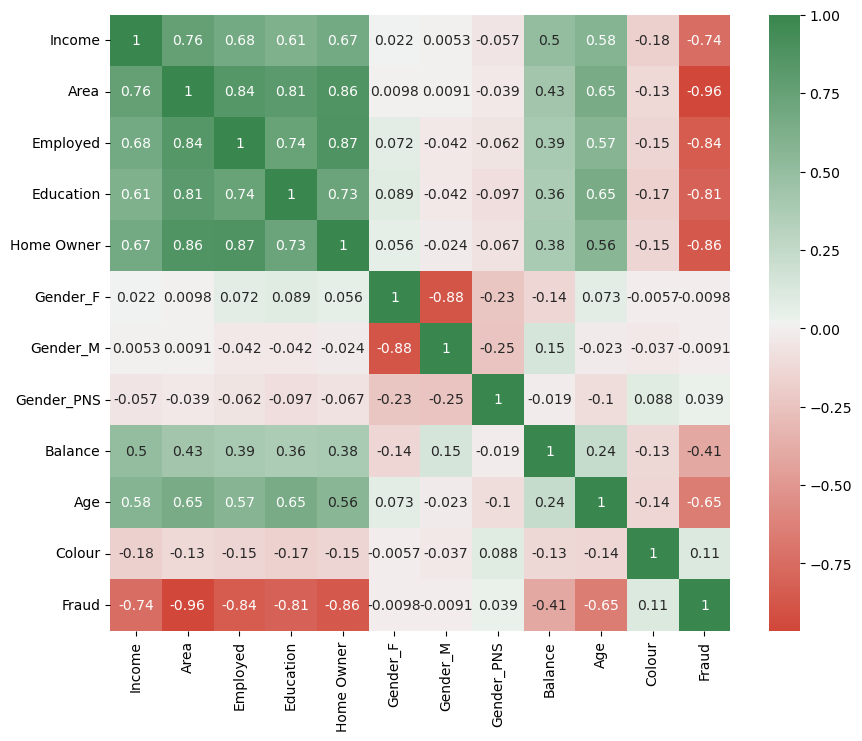

In [23]:
#Use heatmap to view correlations
plt.subplots(figsize=(10,8))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,annot=True,
            cmap=sns.diverging_palette(15, 135, as_cmap=True))

In [24]:
#Drop features that do not correlate, or correlate weakly
df.drop(columns=["Gender_F"], inplace = True) #No correlation
df.drop(columns=["Gender_M"], inplace = True) #No correlation
df.drop(columns=["Gender_PNS"], inplace = True) #No correlation
df.drop(columns=["Colour"], inplace = True) #Very weak correlation
df.drop(columns=["Balance"], inplace = True) #Weak correlation

In [25]:
#Split the data into train/test
X = df.drop(columns='Fraud').values
y = df['Fraud'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# K-Nearest Neighbour Algorithm

In [26]:
#Train the KNN algorithm
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 0.96


In [27]:
#Print the classification accuracy of the model  
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9565217391304348

# Decision Tree

In [28]:
#Train using the Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print('Accuracy of DT classifier on training set: {:.2f}'.format(dt.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'.format(dt.score(X_test, y_test)))

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 1.00


In [29]:
#Print the classification accuracy of the model    
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

# Random Forest

In [30]:
#Train using the Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Accuracy of DT classifier on training set: {:.2f}'.format(rf.score(X_train, y_train)))
print('Accuracy of DT classifier on test set: {:.2f}'.format(rf.score(X_test, y_test)))

Accuracy of DT classifier on training set: 1.00
Accuracy of DT classifier on test set: 1.00


In [31]:
#Print the classification accuracy of the model    
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0